In [6]:
#some code to write a very noise 1 second wav file that can be used in filtering
import cmath
import numpy as np
import matplotlib.pyplot as plt
import wave
from IPython.display import Audio
import soundfile as sf

#first a class to form a naive wave
class waveGen:
    
    def __init__(self, freq, BufferSize, waveType, vol):
        
        self.sampleRate = 48000
        self.bufferSize = BufferSize
        self.buffer = np.empty(BufferSize, dtype=np.complex)
        self.frequency = freq
        self.omega = 0
        self.updateOmega()
        self.last = complex(1,0)
        self.type = waveType
        self.volume = vol
        self.sawLast = 0
        

    def sineGen(self):

        #start = timer() #reduce function!!! functools
        for i in range(0, self.bufferSize):
            self.buffer[i] = self.last
            self.last=self.last*self.omega

        return self.volume * np.imag(self.buffer).astype(np.float32)

    def updateOmega(self):
        self.omega = cmath.exp(1j*(2*cmath.pi * self.frequency / self.sampleRate))

    def updateFreq(self, val):
        self.frequency = val
        self.updateOmega()

    def nextFrame(self):
        if self.type == "sine":
            return self.sineGen()

In [7]:
samplerate = 48000
waver = waveGen(1, samplerate, 'sine', 1.0)
signal = np.full(samplerate, 0.)

for i in range(samplerate // 2):
    waver.updateFreq(i)
    if i % 100 == 0:
        signal += waver.nextFrame()
    if i % 500 == 0:
        print(i)
    
#normalise
h = 0.
for sample in signal:
    if np.abs(sample) > h:
        h = np.abs(sample)
signal /= h
    


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500


In [8]:
sf.write('noise.wav', signal, samplerate)

Audio('noise.wav', rate=samplerate)

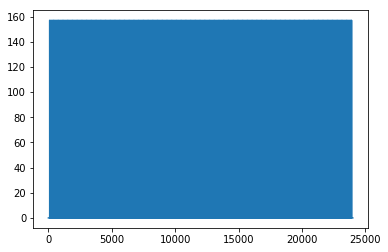

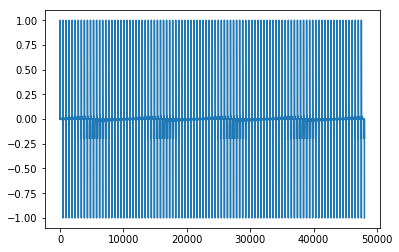

In [11]:
plt.plot(np.abs(np.fft.fft(signal)[:samplerate//2]))
plt.show()

plt.plot(signal)
plt.show()

# damn ugly noise, but useful for filters

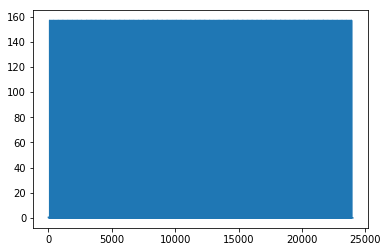

In [12]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

a, b = sf.read('noise.wav')

plt.plot(np.abs(np.fft.fft(a)[:samplerate//2]))
plt.show()

In [13]:
print(len(a))

48000
